<a href="https://colab.research.google.com/github/sarnavadatta/Crypto_data_analysis/blob/main/Online_crypto_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
start=dt.date(2017,12,1)
end=dt.date(2021,11,8)

# Choose the coins
crypto = ['BTC-USD','ETH-USD','XRP-USD','LTC-USD','ADA-USD','LINK-USD']

In [ ]:
#df = reader.get_data_yahoo(crypto,start,end)['Close']

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 5.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=546daa83a3504518b34d0e16485a08d5c4caac70819275a17179d9da0d80f807
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import datetime 
import pandas as pd

start = datetime.datetime(2017,8,15) 
end = datetime.datetime(2021,11,8) 

df=[]
df=pd.DataFrame(df)
Tickers=["BTC-USD","ETH-USD","XRP-USD","LTC-USD","ADA-USD","LINK-USD"]

for ticker in Tickers:
  data= pd.DataFrame(yf.Ticker(ticker).history(start=start, end=end)['Close'])
  df=pd.concat([df, data], axis=1)

df.set_axis(Tickers, axis='columns', inplace=True)
df

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,ADA-USD,LINK-USD
Date,,,,,,
2017-08-15,4181.930176,289.817993,0.161221,43.306499,NaN,NaN
2017-08-16,4376.629883,302.266998,0.160431,44.151199,NaN,NaN
2017-08-17,4331.689941,301.457001,0.157498,43.914600,NaN,NaN
2017-08-18,4160.620117,295.589996,0.158883,47.281399,NaN,NaN
2017-08-19,4193.700195,297.470001,0.155057,45.480000,NaN,NaN
...,...,...,...,...,...,...
2021-11-04,61452.230469,4537.324219,1.202003,202.967987,1.984882,31.020929
2021-11-05,61125.675781,4486.243164,1.161533,199.537933,1.986206,32.917904
2021-11-06,61527.480469,4521.581055,1.152454,197.866364,2.006609,32.083439


In [ ]:
daily_returns = df.pct_change().dropna(axis=0)
daily_returns

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,ADA-USD,LINK-USD
Date,,,,,,
2017-10-02,0.001267,-0.016081,-0.018670,-0.021401,0.038568,-0.182940
2017-10-03,-0.020829,-0.016848,0.003168,-0.019230,-0.197285,-0.031483
2017-10-04,-0.020410,0.000667,0.056345,-0.018149,0.053565,0.149988
2017-10-05,0.023420,0.010951,0.103560,0.005253,-0.020154,0.023095
2017-10-06,0.009796,0.043010,-0.012560,0.008721,-0.137280,0.170284
...,...,...,...,...,...,...
2021-11-04,-0.024104,-0.015165,-0.005620,-0.020000,-0.038193,-0.030319
2021-11-05,-0.005314,-0.011258,-0.033669,-0.016899,0.000667,0.061151
2021-11-06,0.006573,0.007877,-0.007816,-0.008377,0.010272,-0.025350


In [ ]:
# Calculate the cumulative return

daily_cumul_returns = (daily_returns + 1).cumprod() - 1
daily_cumul_returns 

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,ADA-USD,LINK-USD
Date,,,,,,
2017-10-02,0.001267,-0.016081,-0.018670,-0.021401,0.038568,-0.182940
2017-10-03,-0.019588,-0.032659,-0.015562,-0.040219,-0.166326,-0.208663
2017-10-04,-0.039598,-0.032014,0.039907,-0.057639,-0.121671,-0.089972
2017-10-05,-0.017106,-0.021413,0.147599,-0.052688,-0.139373,-0.068955
2017-10-06,-0.007478,0.020676,0.133185,-0.044427,-0.257519,0.089587
...,...,...,...,...,...,...
2021-11-04,12.954554,14.007505,4.819936,2.721227,78.493851,70.043496
2021-11-05,12.880400,13.838551,4.623986,2.658340,78.546879,74.387908
2021-11-06,12.971642,13.955434,4.580026,2.627693,79.364009,72.476834


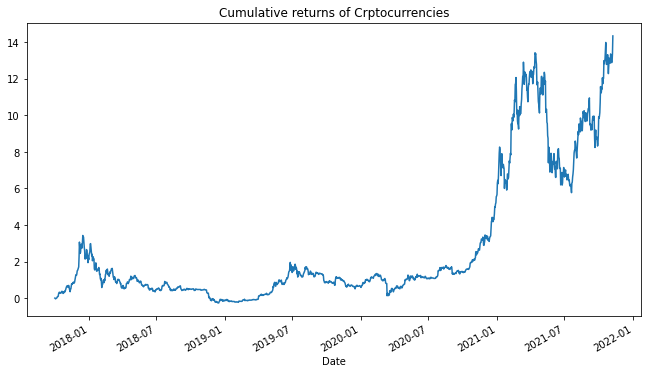

In [ ]:
# colors = ['r','k','b','g','y','m']
daily_cumul_returns['BTC-USD'].plot(figsize=(11,6))
plt.title('Cumulative returns of Crptocurrencies')
plt.show()

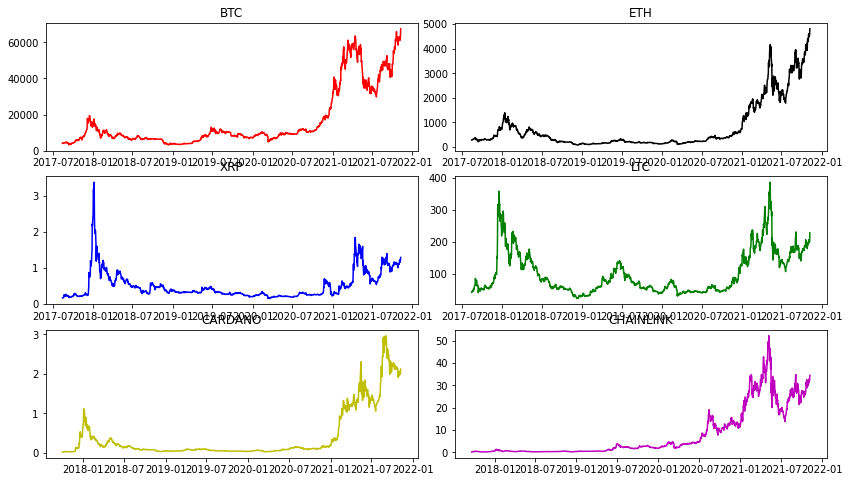

In [ ]:
# Crypto price charts

fig, axs = plt.subplots(3,2,figsize=(14,8),gridspec_kw={'hspace':0.2, 'wspace':0.1})

axs[0,0].plot(df['BTC-USD'],c='r')
axs[0,0].set_title('BTC')

axs[0,1].plot(df['ETH-USD'],c='k')
axs[0,1].set_title('ETH')

axs[1,0].plot(df['XRP-USD'],c='b')
axs[1,0].set_title('XRP')

axs[1,1].plot(df['LTC-USD'],c='g')
axs[1,1].set_title('LTC')

axs[2,0].plot(df['ADA-USD'],c='y')
axs[2,0].set_title('CARDANO')

axs[2,1].plot(df['LINK-USD'],c='m')
axs[2,1].set_title('CHAINLINK')

plt.show()

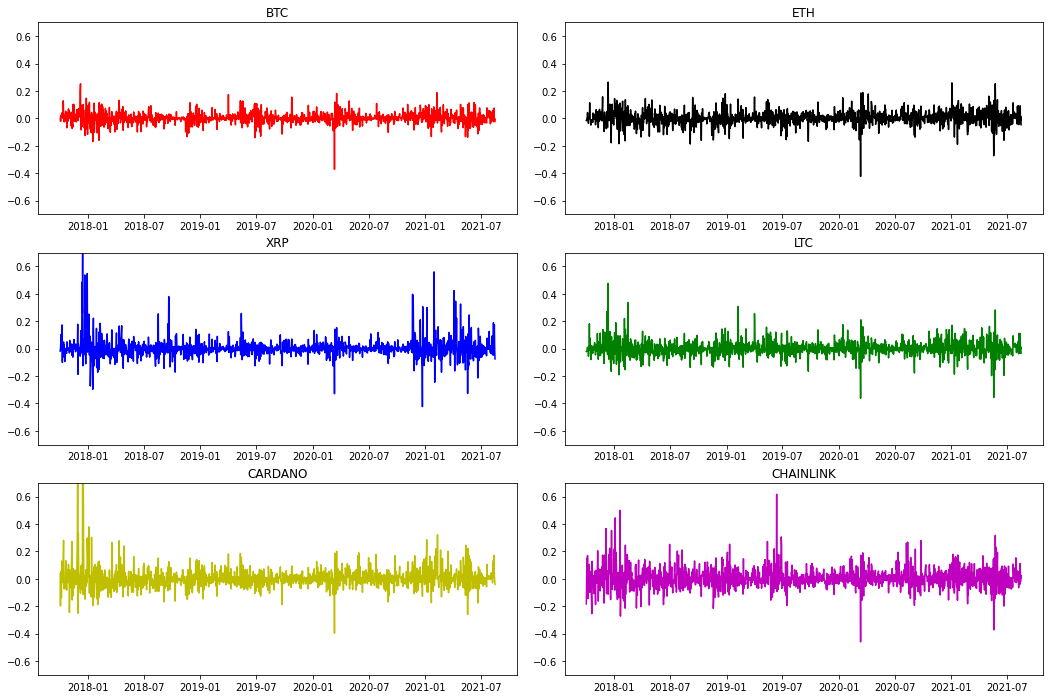

In [ ]:
# Comparison of the volatility

fig, axs = plt.subplots(3,2,figsize=(18,12),gridspec_kw={'hspace':0.2, 'wspace':0.1})

axs[0,0].plot(daily_returns['BTC-USD'],c='r')
axs[0,0].set_title('BTC')
axs[0,0].set_ylim([-0.7,0.7])

axs[0,1].plot(daily_returns['ETH-USD'],c='k')
axs[0,1].set_title('ETH')
axs[0,1].set_ylim([-0.7,0.7])

axs[1,0].plot(daily_returns['XRP-USD'],c='b')
axs[1,0].set_title('XRP')
axs[1,0].set_ylim([-0.7,0.7])

axs[1,1].plot(daily_returns['LTC-USD'],c='g')
axs[1,1].set_title('LTC')
axs[1,1].set_ylim([-0.7,0.7])

axs[2,0].plot(daily_returns['ADA-USD'],c='y')
axs[2,0].set_title('CARDANO')
axs[2,0].set_ylim([-0.7,0.7])

axs[2,1].plot(daily_returns['LINK-USD'],c='m')
axs[2,1].set_title('CHAINLINK')
axs[2,1].set_ylim([-0.7,0.7])


plt.show()

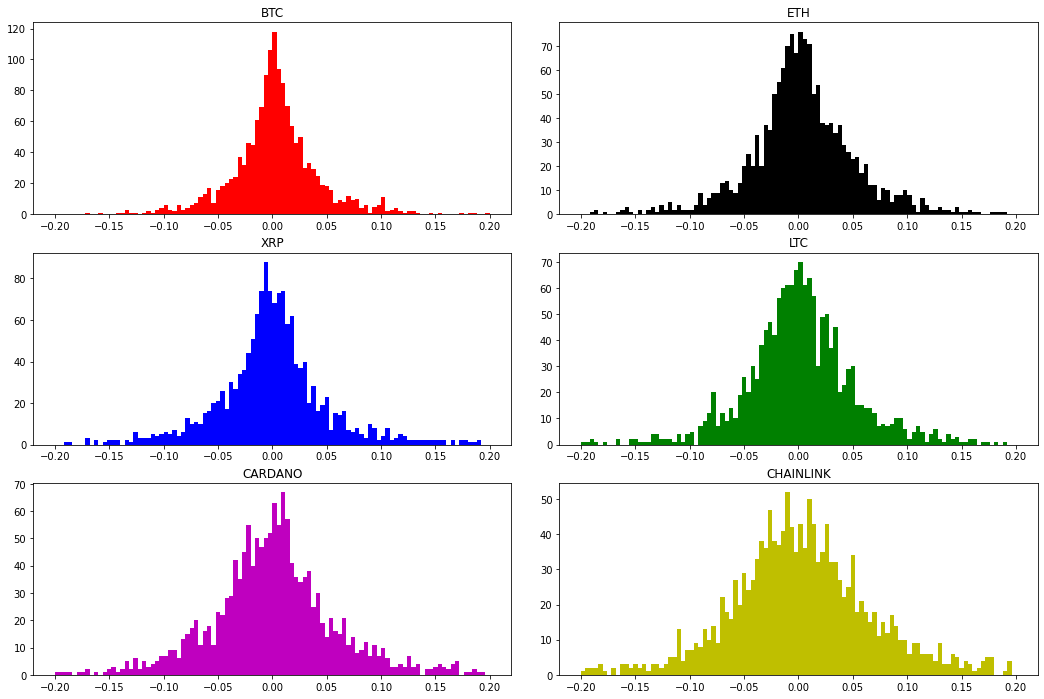

In [ ]:
# How returns are distributed !!!

fig, axs = plt.subplots(3,2,figsize=(18,12),gridspec_kw={'hspace':0.2, 'wspace':0.1})

axs[0,0].hist(daily_returns['BTC-USD'],bins=100,range=(-0.2,0.2),color='r')
axs[0,0].set_title('BTC')

axs[0,1].hist(daily_returns['ETH-USD'],bins=100,range=(-0.2,0.2),color='k')
axs[0,1].set_title('ETH')

axs[1,0].hist(daily_returns['XRP-USD'],bins=100,range=(-0.2,0.2),color='b')
axs[1,0].set_title('XRP')

axs[1,1].hist(daily_returns['LTC-USD'],bins=100,range=(-0.2,0.2),color='g')
axs[1,1].set_title('LTC')

axs[2,0].hist(daily_returns['ADA-USD'],bins=100,range=(-0.2,0.2),color='m')
axs[2,0].set_title('CARDANO')

axs[2,1].hist(daily_returns['LINK-USD'],bins=100,range=(-0.2,0.2),color='y')
axs[2,1].set_title('CHAINLINK')

plt.show()

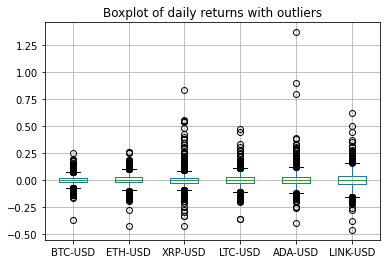

In [ ]:
# Extreme events(returns)

daily_returns.boxplot()
plt.title('Boxplot of daily returns with outliers')
plt.show()

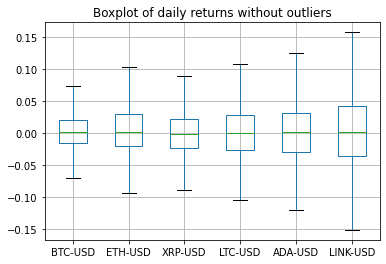

In [ ]:
# Without the outliers

daily_returns.boxplot(showfliers=False)
plt.title('Boxplot of daily returns without outliers')
plt.show()

In [ ]:
# Correlations between cryptocurrency data

daily_returns.corr()

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,ADA-USD,LINK-USD
BTC-USD,1.000000,0.738804,0.475600,0.719669,0.505297,0.478791
ETH-USD,0.738804,1.000000,0.589691,0.799815,0.571204,0.592483
XRP-USD,0.475600,0.589691,1.000000,0.563100,0.552234,0.425616
LTC-USD,0.719669,0.799815,0.563100,1.000000,0.523615,0.495064
ADA-USD,0.505297,0.571204,0.552234,0.523615,1.000000,0.422921
LINK-USD,0.478791,0.592483,0.425616,0.495064,0.422921,1.000000


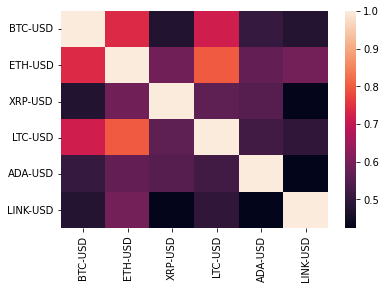

In [ ]:
import seaborn as sns
sns.heatmap(daily_returns.corr())
plt.show()

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 11.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=ff4cf396603df1aa0167939e03d67adb045a542d26525acf676ff2c80c943c48
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# import yfinance as yf
# import datetime 
# import pandas as pd

# start = datetime.datetime(2017,8,15) 
# end = datetime.datetime(2021,8,16) 

# df=[]
# df=pd.DataFrame(df)
# Tickers=["BTC-USD","ETH-USD","XRP-USD","LTC-USD","ADA-USD","LINK-USD"]

# for ticker in Tickers:
#   data= pd.DataFrame(yf.Ticker(ticker).history(start=start, end=end)['Close'])
#   df=pd.concat([df, data], axis=1)

# df.set_axis(Tickers, axis='columns', inplace=True)
# df

#Amazon = yf.Ticker("BTC-USD") 
#print(Amazon.history(start=start, end=end)['Close'])

In [ ]:
# df = yf.download(Tickers, start="2019-01-01", end="2020-01-01",group_by="ticker")
# df["BTC-USD"]["Close"]